In [ ]:
import google.colab
google.colab.drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# imp# keras  tensorflow  sklearn
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation , Embedding
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping

In [ ]:
!pip install opencv-python opencv-python-headless
!pip install scikit-video

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.0 MB/s eta 0:00:00


In [ ]:
# le dataset UCF101
!wget --no-check-certificate https://www.crcv.ucf.edu/data/UCF101/UCF101.rar
!unrar x UCF101.rar

import os
dataset_path = '/content/UCF-101/'
categories = os.listdir(dataset_path)


In [ ]:
print('Nombre de categoreis', len(categories))
print('Quelques categories : ', categories[:10])

Nombre de categoreis 101
Quelques categories :  ['BasketballDunk', 'RockClimbingIndoor', 'RopeClimbing', 'WritingOnBoard', 'Lunges', 'CricketShot', 'Punch', 'HeadMassage', 'SoccerPenalty', 'CuttingInKitchen']


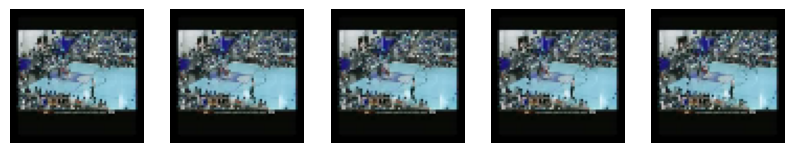

In [ ]:
import cv2
import numpy as np

def load_video(video_path, max_frames=40, resize=(64, 64)):
  cap = cv2.VideoCapture(video_path)
  frames = []
  count = 0
  while True:
    ret, frame = cap.read()
    if not ret or count >= max_frames:
      break
    frame = cv2.resize(frame, resize)
    frames.append(frame)
    count += 1
  cap.release()
  return np.array(frames)

#exemple d'une video
import matplotlib.pyplot as plt
video_example = os.path.join(dataset_path, categories[0], os.listdir(os.path.join(dataset_path, categories[0]))[0])
print("exemple_video",video_example)
video_frames = load_video(video_example)

#visualisation
plt.figure(figsize=(10, 5))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(video_frames[i])
  plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv2D, MaxPooling2D, Flatten, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
def build_cnn(input_shape, num_classes = 10):
  model = Sequential()
  model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu', padding='same'), input_shape=input_shape))
  model.add(TimeDistributed(MaxPooling2D(2, 2)))
  model.add(TimeDistributed(Conv2D(128, (3, 3), activation='relu', padding ='same')))
  model.add(TimeDistributed(MaxPooling2D((2, 2))))
  model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu', padding ='same')))
  model.add(TimeDistributed(MaxPooling2D((2, 2))))
  model.add(TimeDistributed(Flatten()))
  model.add(LSTM(128, return_sequences=False))
  model.add(Dropout(0.5))


  model.add(Dense(128, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model
input_shape = (40, 64, 64, 3)
model = build_cnn(input_shape, num_classes= 10)
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed_68                  │ (None, 40, 64, 64, 32)      │             896 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_69                  │ (None, 40, 32, 32, 32)      │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_70                  │ (None, 40, 32, 32, 64)      │          18,496 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_71                  │ (None, 40, 16, 16, 64)      │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_72                  │ (None, 40, 16, 16, 64)      │          36,928 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_73                  │ (None, 40, 8, 8, 64)        │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_74                  │ (None, 40, 4096)            │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 128)                 │       2,163,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,237,322 (8.53 MB)

 Trainable params: 2,237,322 (8.53 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
len(categories)

101

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

def prepare_data(num_samples_per_class=len(categories)):
  x, y = [], []
  for category_idx, category in enumerate(categories[: 10]):
    video_files = os.listdir(os.path.join(dataset_path, category))[: num_samples_per_class]
    for video_file in video_files:
      video_path = os.path.join(dataset_path, category, video_file)
      frames = load_video(video_path)
      if frames.shape[0] == 40:
        x.append(frames)
        y.append(category_idx)
  x = np.array(x)
  y = to_categorical(np.array(y), num_classes = len(categories[:10]))
  return x, y
x, y = prepare_data()
print(x.shape)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state=42)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001,verbose=1)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



(1008, 40, 64, 64, 3)


In [ ]:
history = model.fit(x_train, y_train, validation_data= (x_val, y_val), epochs = 100, batch_size= 2, callbacks=[early_stopping, reduce_lr])

Epoch 1/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 57s 77ms/step - accuracy: 0.1076 - loss: 2.3275 - val_accuracy: 0.1188 - val_loss: 2.3212 - learning_rate: 1.0000e-04
Epoch 2/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.0692 - loss: 2.3238 - val_accuracy: 0.1188 - val_loss: 2.3224 - learning_rate: 1.0000e-04
Epoch 3/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.1014 - loss: 2.3236 - val_accuracy: 0.1188 - val_loss: 2.3217 - learning_rate: 1.0000e-04
Epoch 4/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 42s 73ms/step - accuracy: 0.0904 - loss: 2.3220 - val_accuracy: 0.1188 - val_loss: 2.3197 - learning_rate: 1.0000e-04
Epoch 5/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 40s 70ms/step - accuracy: 0.1013 - loss: 2.3191 - val_accuracy: 0.1188 - val_loss: 2.3210 - learning_rate: 1.0000e-04
Epoch 6/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.0805 - loss: 2.3324 - val_accuracy: 0.1188 - val_loss: 2.3196 - learning_rate: 1.0000e-04
Epoch 7/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 40s 7

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
video predite : Lunges


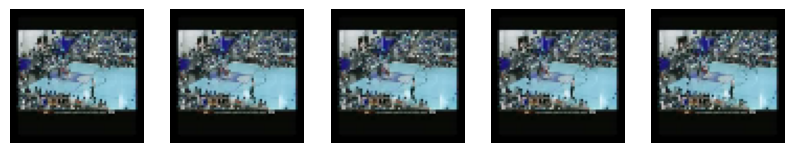

In [ ]:
video_test = load_video(video_example)
video_test = np.expand_dims(video_test, axis=0)
prediction = model.predict(video_test)

predicted_class = categories[np.argmax(prediction)]
print('video predite :', predicted_class)

#visualisation

plt.figure(figsize=(10, 5))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(video_frames[i])
  plt.axis('off')
plt.show()

In [ ]:
x_train.shape

(40, 40, 64, 64, 3)

In [ ]:
y_train.shape

(40, 5)

In [ ]:
x.shape

(503, 40, 64, 64, 3)